<a href="https://colab.research.google.com/github/rahul-08-10/AI-ML/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#EDA

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


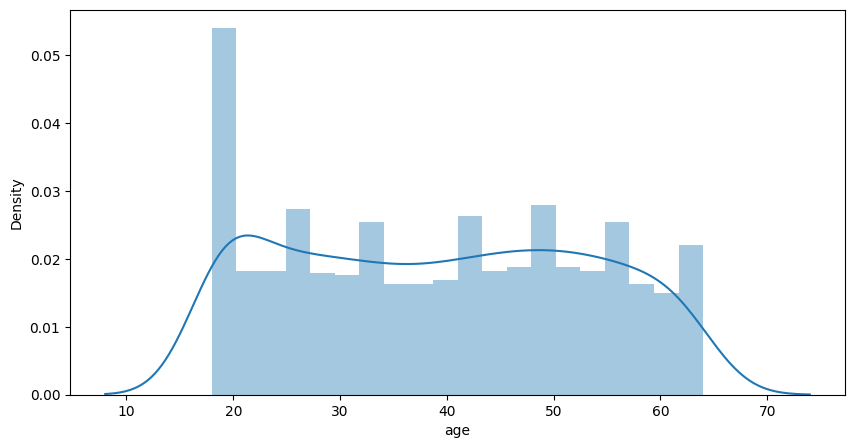

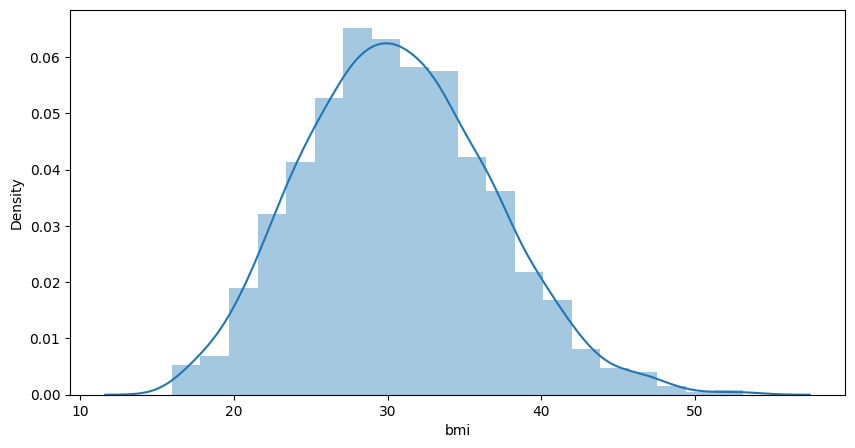

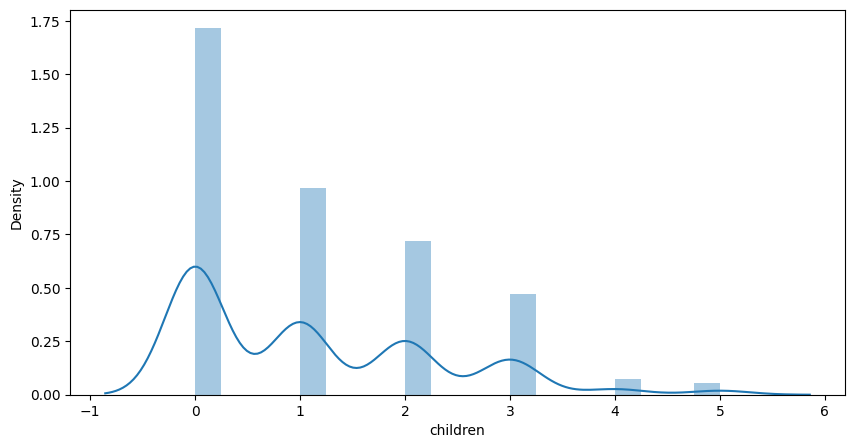

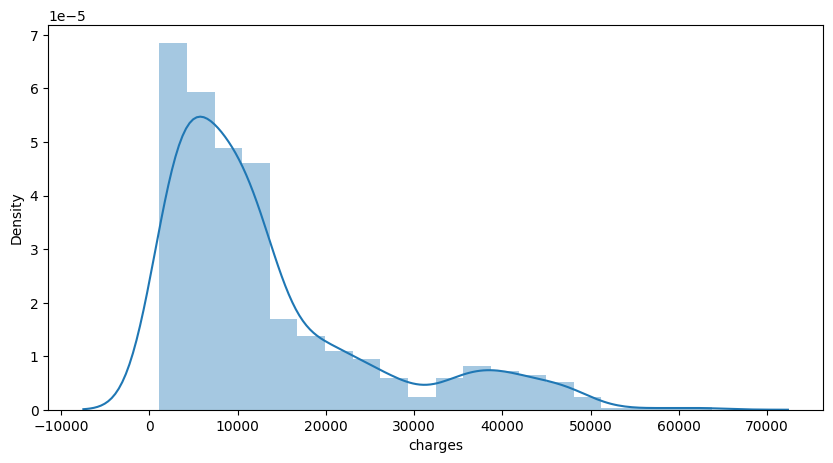

In [ ]:
numeric_column = ['age' , 'bmi' , 'children' , 'charges']
for col in numeric_column:
  plt.figure(figsize=(10,5))
  sns.distplot(data[col] , kde = True , bins = 20)

<Axes: xlabel='children', ylabel='count'>

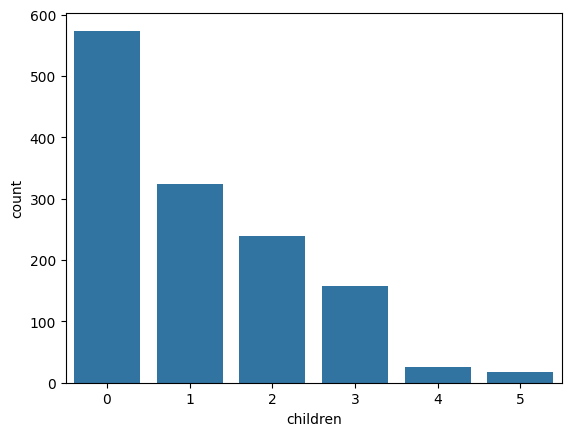

In [ ]:
sns.countplot(x = data['children'])

<Axes: xlabel='sex', ylabel='count'>

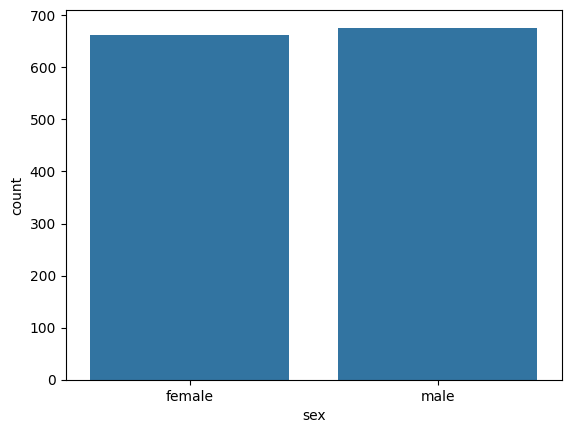

In [ ]:
sns.countplot(x = data["sex"])

<Axes: xlabel='smoker', ylabel='count'>

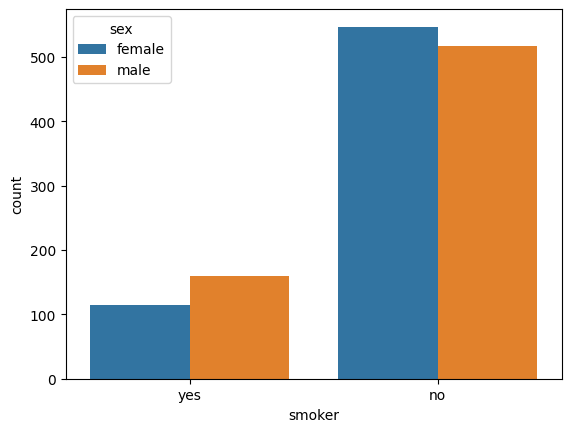

In [ ]:
sns.countplot(x = data["smoker"] , hue=data['sex'])

<Axes: >

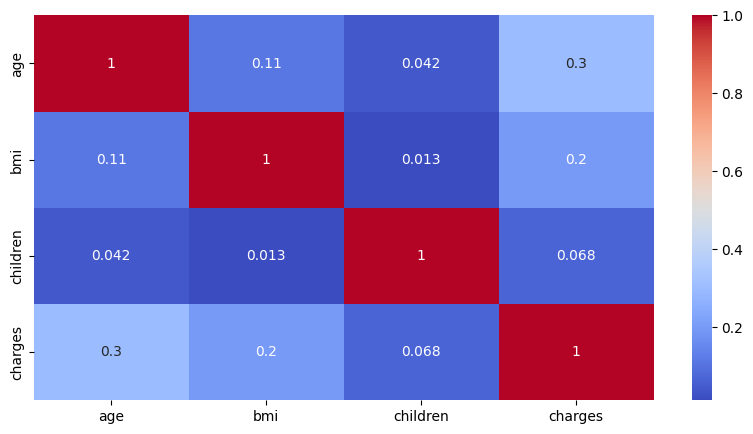

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True) , annot=True , cmap='coolwarm')

# Data Cleaning and Preprocessing

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data["sex"].value_counts()

,count
sex,
male,676
female,662


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_clean = data.copy()

In [ ]:
df_clean["smoker"] = df_clean["smoker"].map({"yes":0 , "no":1})
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,southwest,16884.92400
1,18,male,33.770,1,1,southeast,1725.55230
2,28,male,33.000,3,1,southeast,4449.46200
3,33,male,22.705,0,1,northwest,21984.47061
4,32,male,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,1,northwest,10600.54830
1334,18,female,31.920,0,1,northeast,2205.98080
1335,18,female,36.850,0,1,southeast,1629.83350
1336,21,female,25.800,0,1,southwest,2007.94500


In [ ]:
df_clean["sex"] = df_clean["sex"].map({"male":0 , "female":1})
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [ ]:
df_clean["sex"]

,sex
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,1
1335,1
1336,1


In [ ]:
df_clean.rename(columns={'sex':'is_female' , 'smoker':'is_smoker'} , inplace=True)
df_clean

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [ ]:
df_clean = pd.get_dummies(df_clean , columns=['region'])
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,False,False,False,True
1,18,0,33.770,1,1,1725.55230,False,False,True,False
2,28,0,33.000,3,1,4449.46200,False,False,True,False
3,33,0,22.705,0,1,21984.47061,False,True,False,False
4,32,0,28.880,0,1,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,False,True,False,False
1334,18,1,31.920,0,1,2205.98080,True,False,False,False
1335,18,1,36.850,0,1,1629.83350,False,False,True,False
1336,21,1,25.800,0,1,2007.94500,False,False,False,True


In [ ]:
df_clean.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,0,16884,0,0,0,1
1,18,0,33,1,1,1725,0,0,1,0
2,28,0,33,3,1,4449,0,0,1,0
3,33,0,22,0,1,21984,0,1,0,0
4,32,0,28,0,1,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,1,10600,0,1,0,0
1334,18,1,31,0,1,2205,1,0,0,0
1335,18,1,36,0,1,1629,0,0,1,0
1336,21,1,25,0,1,2007,0,0,0,1


In [ ]:
df_clean['bmi_category'] = pd.cut(
    df_clean['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [ ]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,0,16884.92400,False,False,False,True,Overweight
1,18,0,33.770,1,1,1725.55230,False,False,True,False,Obese
2,28,0,33.000,3,1,4449.46200,False,False,True,False,Obese
3,33,0,22.705,0,1,21984.47061,False,True,False,False,Normal
4,32,0,28.880,0,1,3866.85520,False,True,False,False,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,False,True,False,False,Obese
1334,18,1,31.920,0,1,2205.98080,True,False,False,False,Obese
1335,18,1,36.850,0,1,1629.83350,False,False,True,False,Obese
1336,21,1,25.800,0,1,2007.94500,False,False,False,True,Overweight


In [ ]:
df_clean = pd.get_dummies(df_clean , columns=['bmi_category'])
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,0,16884.92400,False,False,False,True,False,False,True,False
1,18,0,33.770,1,1,1725.55230,False,False,True,False,False,False,False,True
2,28,0,33.000,3,1,4449.46200,False,False,True,False,False,False,False,True
3,33,0,22.705,0,1,21984.47061,False,True,False,False,False,True,False,False
4,32,0,28.880,0,1,3866.85520,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,False,True,False,False,False,False,False,True
1334,18,1,31.920,0,1,2205.98080,True,False,False,False,False,False,False,True
1335,18,1,36.850,0,1,1629.83350,False,False,True,False,False,False,False,True
1336,21,1,25.800,0,1,2007.94500,False,False,False,True,False,False,True,False


In [ ]:
df_clean =  df_clean.astype(int)
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,0,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,1,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,1,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,1,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,1,3866,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,1,10600,0,1,0,0,0,0,0,1
1334,18,1,31,0,1,2205,1,0,0,0,0,0,0,1
1335,18,1,36,0,1,1629,0,0,1,0,0,0,0,1
1336,21,1,25,0,1,2007,0,0,0,1,0,0,1,0


In [ ]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ['age' , 'bmi' , 'children']
scaler =  StandardScaler()
df_clean[cols] = scaler.fit_transform(df_clean[cols])
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.438764,1,-0.518122,-0.908614,0,16884,0,0,0,1,0,0,1,0
1,-1.509965,0,0.462657,-0.078767,1,1725,0,0,1,0,0,0,0,1
2,-0.797954,0,0.462657,1.580926,1,4449,0,0,1,0,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,1,21984,0,1,0,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,1,3866,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0,-0.027733,1.580926,1,10600,0,1,0,0,0,0,0,1
1334,-1.509965,1,0.135731,-0.908614,1,2205,1,0,0,0,0,0,0,1
1335,-1.509965,1,0.953046,-0.908614,1,1629,0,0,1,0,0,0,0,1
1336,-1.296362,1,-0.845048,-0.908614,1,2007,0,0,0,1,0,0,1,0


In [ ]:
from scipy.stats import pearsonr

selected_feature = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker', 'region_northeast',
    'region_northwest', 'region_southeast', 'region_southwest',
]

correlation_matrix = {
    feature:pearsonr(df_clean[feature] , df_clean['charges'])[0]
    for feature in selected_feature
}
correlation_df = pd.DataFrame(list(correlation_matrix.items()) , columns=['feature' , 'correlation'])
correlation_df.sort_values(by='correlation' , ascending=False)

,feature,correlation
0,age,0.299009
1,bmi,0.196188
7,region_southeast,0.073981
2,children,0.067999
5,region_northeast,0.006350
6,region_northwest,-0.039905
8,region_southwest,-0.043210
3,is_female,-0.057293
4,is_smoker,-0.787251


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05  # significance level

# Create categories of charges into 4 quartiles
df_clean['charges_category'] = pd.qcut(
    df_clean['charges'],
    q=4,
    labels=False,
    duplicates='drop' # Add this to handle cases with identical values at quantile boundaries
)

chi2_matrix = {}

for feature in selected_feature:
    contingency_table = pd.crosstab(df_clean[feature], df_clean['charges_category'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    decision = "Reject Null (Keep Feature)" if p_value < alpha else "Accept Null (Drop Feature)"
    chi2_matrix[feature] = {
        "Chi2": chi2,
        "p-value": p_value,
        "dof": dof,
        "Decision": decision
    }
chi2_results = pd.DataFrame(chi2_matrix).T
print(chi2_results)

                         Chi2   p-value  dof                    Decision
age               1521.204566       0.0  138  Reject Null (Keep Feature)
bmi                141.954092  0.025317  111  Reject Null (Keep Feature)
children           139.565803       0.0   15  Reject Null (Keep Feature)
is_female            9.532132  0.022992    3  Reject Null (Keep Feature)
is_smoker          854.020268       0.0    3  Reject Null (Keep Feature)
region_northeast     5.944573  0.114338    3  Accept Null (Drop Feature)
region_northwest     1.226112  0.746749    3  Accept Null (Drop Feature)
region_southeast    15.208814  0.001647    3  Reject Null (Keep Feature)
region_southwest     5.530825  0.136807    3  Accept Null (Drop Feature)


In [ ]:
final_df = df_clean[['age', 'is_female', 'bmi', 'children', 'is_smoker',
                     'charges', 'region_southeast']]
final_df.head()


,age,is_female,bmi,children,is_smoker,charges,region_southeast
0,-1.438764,1,-0.518122,-0.908614,0,16884,0
1,-1.509965,0,0.462657,-0.078767,1,1725,1
2,-0.797954,0,0.462657,1.580926,1,4449,1
3,-0.441948,0,-1.335438,-0.908614,1,21984,0
4,-0.513149,0,-0.354659,-0.908614,1,3866,0


In [ ]:
from sklearn.model_selection import train_test_split
X = final_df.drop('charges' , axis=1)   #we are dropping the x becase well use the x as a input variables
y = final_df['charges']


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()